In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Part V: Image Formation and Visual Reconstruction

In Part V, we finally acknowledge the process by which real-world images are formed. Light is emitted from one or more sources and travels through the scene, interacting with materials via physical processes such as reflection, refraction, and scattering. Some of this light enters the camera and is measured. We have a very good understanding of this forward model. Given known geometry, light sources, and material properties, computer graphics techniques can simulate what will be seen by the camera very accurately.

The ultimate goal for a vision algorithm would be a complete reconstruction, in which we aim to invert this forward model and estimate the light sources, materials, and geometry from the image. Here, we aim to capture a *structural description* of the world: we seek an understanding of where things are and to measure their optical properties, rather than a semantic understanding. Such a structural description can be exploited to navigate around the environment or build 3D models for computer graphics.

Unfortunately, full visual reconstruction is very challenging. For one thing, the solution is non-unique. For example, if the light source intensity increases, but the object reflectance decreases commensurately, the image will remain unchanged. Of course, we could make the problem unique by imposing prior knowledge, but even then reconstruction remains difficult; it is hard to effectively parameterize the scene, and the problem is highly non-convex.

## Sparse Visual Primitives and the Pinhole Camera Model

In this part of the book, we consider a family of models that approximate both the 3D scene and the observed image with sparse sets of visual primitives (points). The forward model that maps the proxy representation of the world (3D points) to the proxy representation of the image (2D points) is much simpler than the full light transport model and is called the *projective pinhole camera*. We can express this conceptually as:

$$
\mathbf{x} = P \mathbf{X},
$$

where:
- $ \mathbf{X} $ is a 3D point in the world (homogeneous coordinates: $ [X, Y, Z, 1]^T $,
- $ \mathbf{x} $ is the corresponding 2D point in the image (homogeneous coordinates: $ [x, y, 1]^T $),
- $ P $ is the projective camera matrix.

We investigate the properties of this model in Chapter 14.

## Planar Scenes and 2D Transformations

In Chapter 15, we consider the situation where the pinhole camera views a plane in the world. There is now a one-to-one mapping between points on the plane and points in the image, and we characterize this mapping with a family of 2D transformations. For a planar scene, the mapping can be described by a homography:

$$
\mathbf{x} = H \mathbf{x}',
$$

where:
- $ \mathbf{x}' $ is a point on the plane in the world,
- $ \mathbf{x} $ is the corresponding point in the image,
- $ H $ is a $ 3 \times 3 $ homography matrix.

## Sparse Geometric Recovery

In Chapter 16, we will further exploit the pinhole camera model to recover a sparse geometric model of the scene, leveraging the simplicity of this projective framework to estimate 3D structure from 2D observations.

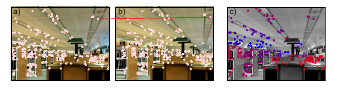

1. Sparse stereo reconstruction. a,b) We are given two images of the same scene, taken from diﬀerent positions, and a set of I pairs of points in these images that are known to correspond to the same points in the world (e.g., the points connected by the red-line are a corresponding pair). c) Our goal is to establish the 3D position of each of the world points. Here, the depth is encoded by color so that closer points are red and more distant points are blue.

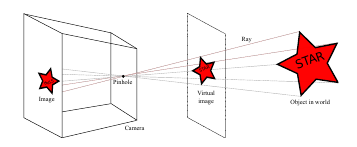
.2 The pinhole camera model. Rays from an object in the world pass through the pinhole in the front of the camera and form an image on the back plane (the image plane). This image is upside-down, so we can alternatively consider the virtual image that would have been created if the image plane was in front of the pinhole. This is not physically possible, but it is more convenient to work with.

## The Pinhole Camera

This chapter introduces the pinhole or projective camera. This is a purely geometric model that describes the process whereby points in the world are projected into the image. Clearly, the position in the image depends on the position in the world, and the pinhole camera model captures this relationship.

To motivate this model, we will consider the problem of sparse stereo reconstruction (see Figure 14.1). We are given two images of a rigid object taken from different positions. Let us assume that we can identify corresponding 2D features between the two images—points that are projected versions of the same position in the 3D world. Now the goal is to establish this 3D position using the observed 2D feature points. The resulting 3D information could be used by a robot to help it navigate through the scene or to facilitate object recognition.

## The Pinhole Camera Model

In real life, a pinhole camera consists of a closed chamber[^1] with a small hole (the pinhole) in the front (see Figure 14.2). Rays from an object in the world pass through this hole to form an inverted image on the back face of the box or image plane. Our goal is to build a mathematical model of this process.

[^1]: This is not an accidental choice of word. The term "camera" is derived from the Latin word for "chamber."

It is slightly inconvenient that the image from the pinhole camera is upside-down. Hence, we instead consider the *virtual image* that would result from placing the image plane in front of the pinhole. Of course, it is not physically possible to build a camera this way, but it is mathematically equivalent to the true pinhole model (except that the image is the right way up) and it is easier to think about. From now on, we will always draw the image plane in front of the pinhole.

### Terminology and Geometry

Fig.3 illustrates the pinhole camera model and defines some terminology. The pinhole itself (the point at which the rays converge) is called the *optical center*. We will assume for now that the optical center is at the origin of the 3D world coordinate system, in which points are represented as:

$$
\mathbf{w} = [u, v, w]^T.
$$

The virtual image is created on the *image plane*, which is displaced from the optical center along the $ w $-axis or *optical axis*. The point where the optical axis strikes the image plane is known as the *principal point*. The distance between the principal point and the optical center (i.e., the distance between the image plane and the pinhole) is known as the *focal length*.

### Figures

- **Figure 14.1: Sparse Stereo Reconstruction**
  - a, b) We are given two images of the same scene, taken from different positions, and a set of $ I $ pairs of points in these images that are known to correspond to the same points in the world (e.g., the points connected by the red line are a corresponding pair).
  - c) Our goal is to establish the 3D position of each of the world points. Here, the depth is encoded by color so that closer points are red and more distant points are blue.

- **Fig.2: The Pinhole Camera Model**
  - Rays from an object in the world pass through the pinhole in the front of the camera and form an image on the back plane (the image plane). This image is upside-down, so we can alternatively consider the virtual image that would have been created if the image plane was in front of the pinhole. This is not physically possible, but it is more convenient to work with.

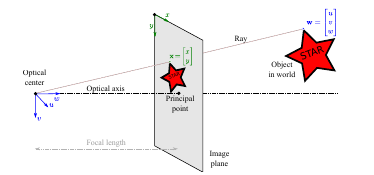

3 Pin-hole camera model terminology. The optical center (pinhole) is placed at the origin of the 3D world coordinate system (u, v, w), and the image plane (where the virtual image is formed) is displaced along the w-axis, which is also known as the optical axis. The position where the optical axis strikes the image plane is called the principal point. The distance between the image plane and the optical center is called the focal length.

- **Fig.3: Pinhole Camera Model Terminology**
  - The optical center (pinhole) is placed at the origin of the 3D world coordinate system $ (u, v, w) $, and the image plane (where the virtual image is formed) is displaced along the $ w $-axis, which is also known as the optical axis. The position where the optical axis strikes the image plane is called the principal point. The distance between the image plane and the optical center is called the focal length.

### Mathematical Formulation

The pinhole camera model is a generative model that describes the likelihood $ \Pr(\mathbf{x} | \mathbf{w}) $ of observing a feature at position:

$$
\mathbf{x} = [x, y]^T
$$

in the image, given that it is the projection of a 3D point:

$$
\mathbf{w} = [u, v, w]^T
$$

in the world. Although light transport is essentially deterministic, we will nonetheless build a probability model; there is noise in the sensor, and unmodeled factors in the feature detection process can also affect the measured image position. However, for pedagogical reasons, we will defer a discussion of this uncertainty until later and temporarily treat the imaging process as if it were deterministic.

Our task then is to establish the position $ \mathbf{x} = [x, y]^T $ where the 3D point $ \mathbf{w} = [u, v, w]^T $ is imaged. Considering Figure 14.3, it is clear how to do this. We connect a ray between $ \mathbf{w} $ and the optical center. The image position $ \mathbf{x} $ can be found by observing where this ray strikes the image plane. This process is called *perspective projection*.

In the next few sections, we will build a more precise mathematical model of this process. We will start with a very simple camera model (the normalized camera) and build up to a full camera parameterization.

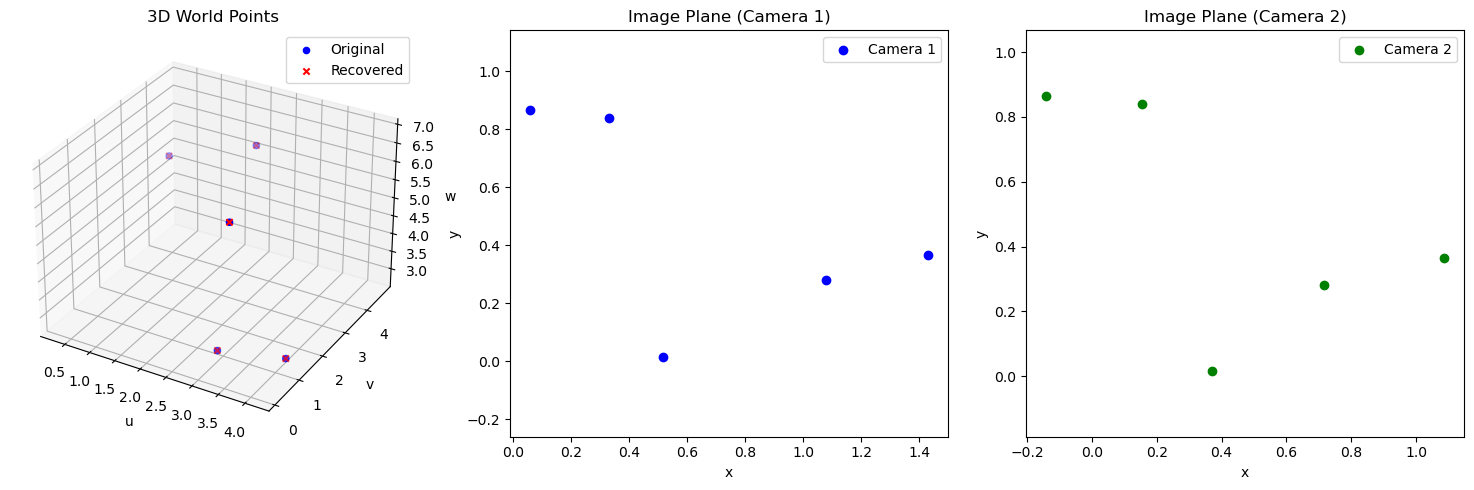

Original 3D points:
 [[1.87270059 4.75357153 5.65996971]
 [2.99329242 0.7800932  2.7799726 ]
 [0.29041806 4.33088073 5.00557506]
 [3.54036289 0.10292247 6.84954926]
 [4.1622132  1.06169555 2.90912484]]
Projected 2D points (Camera 1):
 [[0.3308676  0.83985812]
 [1.0767345  0.28061183]
 [0.05801892 0.86521142]
 [0.51687531 0.01502617]
 [1.4307441  0.36495359]]
Projected 2D points (Camera 2):
 [[ 0.15418821  0.83985812]
 [ 0.71701873  0.28061183]
 [-0.14175833  0.86521142]
 [ 0.3708803   0.01502617]
 [ 1.08699811  0.36495359]]
Recovered 3D points:
 [[1.87270059 4.75357153 5.65996971]
 [2.99329242 0.7800932  2.7799726 ]
 [0.29041806 4.33088073 5.00557506]
 [3.54036289 0.10292247 6.84954926]
 [4.1622132  1.06169555 2.90912484]]


In [2]:
# Pinhole Camera Model Implementation

### This implementation simulates the pinhole camera model for perspective projection and sparse stereo reconstruction. We’ll:
#### 1. Define a simple pinhole camera with a focal length and project 3D points onto a 2D image plane.
#### 2. Simulate two cameras to perform sparse stereo reconstruction, estimating 3D positions from 2D correspondences.


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pinhole camera projection function
def project_pinhole(X, focal_length=1.0, center=np.array([0, 0, 0])):
    """
    Project 3D points X (n x 3) to 2D image plane using pinhole model.
    X: 3D points [u, v, w], center: optical center, focal_length: distance to image plane.
    Returns 2D points [x, y].
    """
    X = X - center  # Translate points relative to optical center
    u, v, w = X[:, 0], X[:, 1], X[:, 2]
    x = (focal_length * u) / w  # Perspective projection
    y = (focal_length * v) / w
    return np.column_stack((x, y))

# Stereo triangulation (simplified)
def triangulate(x1, x2, baseline=1.0, focal_length=1.0):
    """
    Estimate 3D points from 2D correspondences in two images.
    x1, x2: 2D points [x, y] from left and right images, baseline: distance between cameras.
    """
    disparity = x1[:, 0] - x2[:, 0]  # Difference in x-coordinates
    w = (baseline * focal_length) / disparity  # Depth
    u = (x1[:, 0] * w) / focal_length  # Back-project to 3D
    v = (x1[:, 1] * w) / focal_length
    return np.column_stack((u, v, w))

# Define 3D world points
np.random.seed(42)
n_points = 5
X_world = np.random.uniform(0, 5, (n_points, 3))  # Random points in [0, 5]^3
X_world[:, 2] += 2  # Ensure w > 0 (in front of camera)

# Camera parameters
focal_length = 1.0
baseline = 1.0  # Distance between two cameras

# Camera 1 (left): optical center at origin
center1 = np.array([0, 0, 0])
x1 = project_pinhole(X_world, focal_length, center1)

# Camera 2 (right): optical center shifted along u-axis
center2 = np.array([baseline, 0, 0])
x2 = project_pinhole(X_world, focal_length, center2)

# Triangulate to recover 3D points
X_recovered = triangulate(x1, x2, baseline, focal_length)

# Visualization
fig = plt.figure(figsize=(15, 5))

# Plot 3D world points and recovered points
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_world[:, 0], X_world[:, 1], X_world[:, 2], c='b', label='Original')
ax1.scatter(X_recovered[:, 0], X_recovered[:, 1], X_recovered[:, 2], c='r', marker='x', label='Recovered')
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.set_zlabel('w')
ax1.set_title('3D World Points')
ax1.legend()

# Plot 2D image points (Camera 1)
ax2 = fig.add_subplot(132)
ax2.scatter(x1[:, 0], x1[:, 1], c='b', label='Camera 1')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Image Plane (Camera 1)')
ax2.axis('equal')
ax2.legend()

# Plot 2D image points (Camera 2)
ax3 = fig.add_subplot(133)
ax3.scatter(x2[:, 0], x2[:, 1], c='g', label='Camera 2')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Image Plane (Camera 2)')
ax3.axis('equal')
ax3.legend()

plt.tight_layout()
plt.show()

# Print results
print("Original 3D points:\n", X_world)
print("Projected 2D points (Camera 1):\n", x1)
print("Projected 2D points (Camera 2):\n", x2)
print("Recovered 3D points:\n", X_recovered)

# Bayesian Logistic Regression with Laplace Approximation

## Inference

In inference, we aim to compute the posterior distribution $P(\psi | X, w)$ over the parameters $\psi$ given the training data $X$ and labels $w$. We approximate this posterior using a Laplace approximation, which results in a multivariate normal distribution:

$$
P(\psi | X, w) \approx q(\psi) = \text{Norm}_{\psi}[\mu, \Sigma]
$$

where $\mu$ is the maximum a posteriori (MAP) estimate of $\psi$, and $\Sigma$ is the covariance matrix.

## Computing the Posterior

To compute the posterior distribution, we first find the MAP estimate $\hat{\psi}$ by maximizing the log posterior probability:

$$
\hat{\psi} = \arg\max_{\psi} \log P(w | X, \psi) + \log P(\psi)
$$

The gradients of the log posterior with respect to $\psi$ are given by:

$$
\frac{\partial L}{\partial \psi} = -\sum_{i=1}^I (sig[a_i] - w_i) x_i - \frac{1}{\sigma_p^2}
$$

and

$$
\frac{\partial^2 L}{\partial \psi^2} = -\sum_{i=1}^I sig[a_i](1 - sig[a_i]) x_i x_i^T - \frac{1}{\sigma_p^2}
$$

where $a_i = \psi^T x_i$.

The covariance matrix $\Sigma$ is then computed as:

$$
\Sigma = -\left(\frac{\partial^2 L}{\partial \psi^2}\right)^{-1}_{\psi=\hat{\psi}}
$$

## Predictive Distribution

During inference, we compute the distribution over the activation $a = \psi^T x^*$ for a new data point $x^*$:

$$
P(a) = P(\psi^T x^*) = \text{Norm}_a[\mu_a, \sigma_a^2]
$$

where $\mu_a = \hat{\psi}^T x^*$ and $\sigma_a^2 = x^{*T} \Sigma x^*$.

We then approximate the predictive distribution using the activation integral approximation:

$$
P(w^* | x^*, X, w) \approx \frac{1}{1 + \exp\left(-\frac{\mu_a}{1 + \frac{\pi \sigma_a^2}{8}}\right)}
$$

## Kernel Logistic Regression

The dual model developed above relies only on inner products $x_i^T x_j$ of the data. This makes it suitable for kernelization, where we define a kernel function $k[\cdot, \cdot]$ that computes the inner product of the transformed data vectors:

$$
k(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

where $\phi(\cdot)$ is a feature mapping function. By using a kernel function, we can efficiently compute the inner products without explicitly computing the feature mappings, making the algorithm more scalable to high-dimensional data.

## Advantages of Dual Model

The dual model has several advantages:

1. **Reduced parameters**: The dual model has fewer parameters than the original model, making it faster to fit in high dimensions.
2. **Kernelization**: The reliance on inner products allows for kernelization, enabling the use of nonlinear feature mappings without explicitly computing them.
3. **Bayesian inference**: The dual model provides a Bayesian approach to logistic regression, allowing for uncertainty quantification and more robust predictions.

In summary, the Bayesian logistic regression model with Laplace approximation and kernelization provides a powerful and efficient framework for binary classification tasks, particularly in high-dimensional settings.


In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

class BayesianLogisticRegression:
    def __init__(self, sigma_p=1.0, prior_mean=0, prior_variance=100):
        self.sigma_p = sigma_p
        self.prior_mean = prior_mean
        self.prior_variance = prior_variance
        self.theta_mean = None
        self.theta_variance = None

    def _log_posterior(self, theta, X, y):
        """Compute the log posterior probability."""
        a = X @ theta
        log_likelihood = np.sum(y * np.log(self.sigmoid(a)) + (1 - y) * np.log(1 - self.sigmoid(a)))
        log_prior = -0.5 * np.sum((theta - self.prior_mean) ** 2) / self.prior_variance
        return log_likelihood + log_prior

    def _gradient(self, theta, X, y):
        """Compute the gradient of the negative log posterior."""
        a = X @ theta
        grad = np.sum((self.sigmoid(a) - y)[:, np.newaxis] * X, axis=0)
        return -grad / len(y)

    def _hessian(self, theta, X, y):
        """Compute the Hessian of the negative log posterior."""
        a = X @ theta
        diag_sigmoid = self.sigmoid(a) * (1 - self.sigmoid(a))
        hess = np.sum(diag_sigmoid[:, np.newaxis, np.newaxis] * X[:, np.newaxis] * X[:, :, np.newaxis], axis=0)
        return -hess / len(y)

    def fit(self, X, y):
        """Fit the model using Laplace approximation."""
        # Initialize theta with prior mean
        theta0 = np.full(X.shape[1], self.prior_mean)
        
        # Find MAP estimate using gradient descent
        result = minimize(
            fun=lambda theta: -self._log_posterior(theta, X, y),
            x0=theta0,
            jac=lambda theta: -self._gradient(theta, X, y),
            method='BFGS'
        )
        self.theta_mean = result.x

        # Compute Hessian at the MAP estimate
        hessian = self._hessian(self.theta_mean, X, y)
        
        # Compute covariance matrix (inverse of Hessian)
        self.theta_variance = np.linalg.inv(hessian + np.eye(X.shape[1]) / self.prior_variance)

    def predict_proba(self, X_new):
        """Predict probabilities for new data using Laplace approximation."""
        a = X_new @ self.theta_mean
        mu_a = a
        sigma_a2 = np.sum(X_new @ self.theta_variance * X_new, axis=1)
        
        # Activation integral approximation
        proba = 1 / (1 + np.exp(-mu_a / (1 + np.pi * sigma_a2 / 8)))
        return proba

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def kernel(self, X1, X2):
        """Compute kernel matrix for kernelized version."""
        return np.dot(X1, X2.T)

# Example usage
if __name__ == "__main__":
    import numpy as np
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Generate synthetic dataset
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the model
    model = BayesianLogisticRegression(sigma_p=1.0, prior_mean=0, prior_variance=100)
    model.fit(X_train, y_train)

    # Predict probabilities for test data
    y_proba = model.predict_proba(X_test)
    y_pred = (y_proba > 0.5).astype(int)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.1400


In [2]:
import math
import random

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Logistic function for predictions
def logistic(x):
    return 1 / (1 + math.exp(-x))

# Dot product of two vectors
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

# Matrix-vector multiplication
def matvec_mul(M, v):
    return [sum(M_i * v_i for M_i, v_i in zip(row, v)) for row in M]

# Gradient of the negative log posterior
def gradient(theta, X, y):
    m = len(y)
    a = [dot(x, theta) for x in X]
    sig_a = [sigmoid(a_i) for a_i in a]
    grad = [0] * len(theta)
    for i in range(m):
        for j in range(len(theta)):
            grad[j] -= (sig_a[i] - y[i]) * X[i][j]
    return [-g / m for g in grad]

# Hessian of the negative log posterior
def hessian(theta, X, y):
    m = len(y)
    a = [dot(x, theta) for x in X]
    sig_a = [sigmoid(a_i) for a_i in a]
    diag_sigmoid = [s * (1 - s) for s in sig_a]
    hess = [[0 for _ in range(len(theta))] for _ in range(len(theta))]
    for i in range(m):
        for j in range(len(theta)):
            for k in range(len(theta)):
                hess[j][k] -= diag_sigmoid[i] * X[i][j] * X[i][k]
    return [[-h / m for h in row] for row in hess]

# Inverse of a 2x2 matrix
def inverse2x2(A):
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    return [[A[1][1] / det, -A[0][1] / det],
            [-A[1][0] / det, A[0][0] / det]]

# Laplace approximation for Bayesian logistic regression
class BayesianLogisticRegression:
    def __init__(self, sigma_p=1.0, prior_mean=0, prior_variance=100):
        self.sigma_p = sigma_p
        self.prior_mean = prior_mean
        self.prior_variance = prior_variance
        self.theta_mean = None
        self.theta_variance = None

    def fit(self, X, y, max_iterations=1000, tolerance=1e-6):
        m, n = len(X), len(X[0])
        theta = [self.prior_mean] * n
        
        for _ in range(max_iterations):
            grad = gradient(theta, X, y)
            if max(abs(g) for g in grad) < tolerance:
                break
            hess = hessian(theta, X, y)
            theta = [theta[j] - 0.01 * grad[j] for j in range(n)]  # Simple gradient descent
        
        self.theta_mean = theta
        
        # Compute Hessian at the MAP estimate
        hess = hessian(theta, X, y)
        
        # Add prior precision to Hessian
        prior_precision = [[1 / self.prior_variance if i == j else 0 for j in range(n)] for i in range(n)]
        hess = [[hess[i][j] + prior_precision[i][j] for j in range(n)] for i in range(n)]
        
        # Invert Hessian for covariance
        if n == 2:  # Handle 2D case
            self.theta_variance = inverse2x2(hess)
        else:
            # For higher dimensions, assume diagonal approximation
            self.theta_variance = [[1 / hess[i][i] if i == j else 0 for j in range(n)] for i in range(n)]

    def predict_proba(self, X_new):
        a = [dot(x, self.theta_mean) for x in X_new]
        mu_a = a
        sigma_a2 = [sum(x_i * x_j * self.theta_variance[i][j] for i, x_i in enumerate(x) for j, x_j in enumerate(x)) for x in X_new]
        proba = [logistic(mu_a_i / (1 + math.pi * sigma_a2_i / 8)) for mu_a_i, sigma_a2_i in zip(mu_a, sigma_a2)]
        return proba

# Example usage
if __name__ == "__main__":
    # Generate synthetic dataset
    X = [[1, 2], [2, 3], [3, 1], [4, 4]]
    y = [0, 1, 0, 1]

    # Initialize and fit the model
    model = BayesianLogisticRegression(sigma_p=1.0, prior_mean=0, prior_variance=100)
    model.fit(X, y)

    # Predict probabilities for new data
    X_new = [[2, 2], [3, 3]]
    y_proba = model.predict_proba(X_new)
    print("Predicted probabilities:", y_proba)


Predicted probabilities: [0.5547249657526452, 0.5496914276229735]


# Kernel Logistic Regression

Kernel logistic regression extends the dual formulation of logistic regression by replacing inner products between data vectors with a kernel function. This allows the model to operate in a high-dimensional feature space without explicitly computing the feature mappings.

## Kernel Function

The kernel function \( k(x_i, x_j) \) computes the inner product of the transformed data vectors \( z_i = f(x_i) \) and \( z_j = f(x_j) \):

$$
k(x_i, x_j) = z_i^T z_j
$$

This approach avoids the need to explicitly compute the transformed vectors \( z \), which can be of very high or even infinite dimensions. For more details on kernel functions, see Section 8.4.

## Kernel Logistic Regression Model

The kernel logistic regression model is given by:

$$
P(w | X, \psi) = \prod_{i=1}^I \text{Bern}(w_i | \sigma(\psi^T K[X, x_i]))
$$

where \( K[X, x_i] \) is a column vector of kernel evaluations between the training data \( X \) and the \( i \)-th training example \( x_i \).

## Maximum Likelihood Learning

For maximum likelihood learning, we optimize the log posterior probability \( L \) with respect to the parameters \( \psi \). The required derivatives are:

$$
\frac{\partial L}{\partial \psi} = -\sum_{i=1}^I (w_i - \sigma(a_i)) K[X, x_i]
$$

$$
\frac{\partial^2 L}{\partial \psi^2} = -\sum_{i=1}^I \sigma(a_i)(1 - \sigma(a_i)) K[X, x_i] K[x_i, X]
$$

where \( a_i = \psi^T K[X, x_i] \).

## Radial Basis Kernel

A common choice for the kernel function is the radial basis function (RBF) kernel:

$$
k(x_i, x_j) = \exp\left(-\frac{1}{2\lambda^2} \|x_i - x_j\|^2\right)
$$

This kernel corresponds to an infinite-dimensional feature mapping and is widely used in practice.

## Gaussian Process Classification

The Bayesian formulation of kernel logistic regression is also known as Gaussian process classification. It follows a similar dual formulation, replacing dot products with kernel functions.

## Relevance Vector Classification

While kernel logistic regression is powerful, it can be computationally expensive due to the need to compute kernel evaluations with all training examples. Relevance vector classification (RVC) aims to address this by sparsifying the model, making it depend only on a subset of the training examples.

## Example

Examples of kernel logistic regression with a radial basis kernel are shown in Figures 9.12 and 9.13.



In [4]:
import math

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Radial Basis Function (RBF) kernel
def kernel_rbf(x1, x2, lambda_=1.0):
    return math.exp(-0.5 * sum((a - b)**2 for a, b in zip(x1, x2)) / (lambda_ ** 2))

# Compute kernel matrix
def kernel_matrix(X, kernel_func):
    n = len(X)
    K = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            K[i][j] = kernel_func(X[i], X[j])
    return K

# Logistic regression with kernel (without libraries)
def logistic_regression_kernel(X, y, lambda_=1.0, max_iterations=1000, tolerance=1e-6):
    n = len(X)
    K = kernel_matrix(X, kernel_rbf)  # Correctly pass the kernel function
    psi = [0.0]  # Initialize parameter psi
    
    for _ in range(max_iterations):
        a = [psi[0] * K[i][0] for i in range(n)]  # Compute activations
        sig_a = [sigmoid(a_i) for a_i in a]
        grad = 0
        for i in range(n):
            grad -= (sig_a[i] - y[i]) * K[i][0]
        if abs(grad) < tolerance:
            break
        psi[0] -= 0.01 * grad  # Simple gradient descent update
    
    return psi[0]

# Example usage
if __name__ == "__main__":
    # Synthetic dataset
    X = [[1, 2], [2, 3], [3, 1], [4, 4]]
    y = [0, 1, 0, 1]

    # Train kernel logistic regression
    psi = logistic_regression_kernel(X, y)
    print("Learned parameter psi:", psi)


Learned parameter psi: 8.331452610726569


In [5]:
# Kernel Logistic Regression Implementation (without libraries)

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def kernel_rbf(x1, x2, lambda_=1.0):
    return math.exp(-0.5 * sum((a - b) ** 2 for a, b in zip(x1, x2)) / (lambda_ ** 2))

def kernel_matrix(X, kernel_func):
    n = len(X)
    K = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            K[i][j] = kernel_func(X[i], X[j])
    return K

def logistic_regression_kernel(X, y, lambda_=1.0, max_iterations=1000, tolerance=1e-6):
    n = len(X)
    K = kernel_matrix(X, lambda kernel_rbf)
    psi = [0.0]  # Initialize parameter psi
    
    for _ in range(max_iterations):
        a = [psi[0] * K[i][j] for j in range(n)]
        sig_a = [sigmoid(a_i) for a_i in a]
        grad = 0
        for i in range(n):
            grad -= (sig_a[i] - y[i]) * K[i][0]
        if abs(grad) < tolerance:
            break
        psi[0] -= 0.01 * grad  # Simple gradient descent
    
    return psi[0]

# Example usage
X = [[1, 2], [2, 3], [3, 1], [4, 4]]
y = [0, 1, 0, 1]

# Train kernel logistic regression
psi = logistic_regression_kernel(X, y)
print("Learned parameter psi:", psi)


SyntaxError: invalid syntax (1163843811.py, line 19)

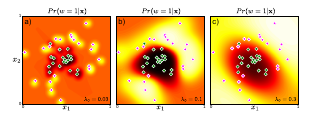

Fig.12 Kernel logistic regression using RBF kernel and maximum likelihood learning. a) With a small length scale λ, the model does not interpolate much from the data examples. b) With a reasonable length scale, the clas- siﬁer does a good job of modeling the posterior P r(w = 1|x). c) With a large length scale, the estimated posterior is very smooth and the model interpolates conﬁdent decisions into regions such as the top-left where there is no data.


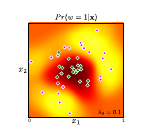

Fig. 12 b
Kernel logistic regression with RBF kernel in a Bayesian set- ting: we now take account of our un- certainty in the dual parameters ψ by approximating their posterior dis- tribution using Laplace’s method and marginalizing them out of the model. This produces a very similar result to the maximum likelihood case with the same length scale (ﬁg. 12b). How- ever, as is typical with Bayesian imple- mentations, the conﬁdence is (appropriately) somewhat lower.

# Kernel Logistic Regression and Relevance Vector Classification

## Kernel Logistic Regression with RBF Kernel

Kernel logistic regression using a radial basis function (RBF) kernel can be visualized as follows:

- **Small Length Scale (Figure 9.12a)**: With a small length scale \(\lambda\), the model does not interpolate much from the data examples. The decision boundary is highly influenced by nearby points.
  
- **Reasonable Length Scale (Figure 9.12b)**: With a reasonable length scale, the classifier effectively models the posterior \(P(w = 1|x)\). The decision boundary smoothly separates the classes.

- **Large Length Scale (Figure 9.12c)**: With a large length scale, the estimated posterior becomes very smooth. The model interpolates confident decisions into regions with no data, such as the top-left corner.

## Bayesian Kernel Logistic Regression (Figure 9.13)

In a Bayesian setting, we account for uncertainty in the dual parameters \(\psi\) by approximating their posterior distribution using Laplace’s method and marginalizing them out of the model. This approach produces results similar to maximum likelihood estimation but with appropriately lower confidence, especially in regions far from the training data.

## Relevance Vector Classification (RVC)

Relevance vector classification is an extension of Bayesian kernel logistic regression that aims to achieve sparsity in the model. Instead of depending on all training examples, RVC selects a subset of relevant examples to build the model.

### Prior Distribution

The prior distribution over the dual parameters \(\psi\) is replaced with a product of one-dimensional Student's t-distributions:

$$
P(\psi) = \prod_{i=1}^I \text{Stud}_{\psi_i}[0, 1, \nu]
$$

This prior encourages sparsity, as many of the \(\psi_i\) values will be close to zero.

### Marginalization

Each Student's t-distribution is re-written as a marginalization of a joint distribution:

$$
P(\psi_i, h_i) = \text{Norm}(\psi_i | 0, h_i^{-1}) \cdot \text{Gam}(h_i | \nu + 1, \nu)
$$

where \(\text{Gam}\) denotes the Gamma distribution.

### Sparse Model

By applying the Bayesian approach to this model, we obtain relevance vector classification. This method encourages sparsity in the model, as only a few training examples (those with non-zero weights) contribute significantly to the decision boundary.

## Advantages of RVC

- **Sparsity**: The model depends only on a subset of the training examples, reducing computational complexity.
- **Bayesian Framework**: Incorporates uncertainty in the model parameters, leading to more robust predictions.
- **Flexibility**: Can be applied with various kernel functions, including the RBF kernel.

## Conclusion

Kernel logistic regression and relevance vector classification are powerful tools for binary classification, especially in high-dimensional spaces. The Bayesian approach, combined with sparsity-inducing priors, provides a robust and efficient framework for modeling complex decision boundaries.




In [6]:
import math

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Radial Basis Function (RBF) kernel
def kernel_rbf(x1, x2, lambda_=1.0):
    return math.exp(-0.5 * sum((a - b)**2 for a, b in zip(x1, x2)) / (lambda_ ** 2))

# Compute kernel matrix
def kernel_matrix(X, kernel_func):
    n = len(X)
    K = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            K[i][j] = kernel_func(X[i], X[j])
    return K

# Logistic regression with kernel (without libraries)
def logistic_regression_kernel(X, y, lambda_=1.0, max_iterations=1000, tolerance=1e-6):
    n = len(X)
    K = kernel_matrix(X, kernel_rbf)  # Correctly pass the kernel function
    psi = [0.0]  # Initialize parameter psi
    
    for _ in range(max_iterations):
        a = [psi[0] * K[i][0] for i in range(n)]  # Compute activations
        sig_a = [sigmoid(a_i) for a_i in a]
        grad = 0
        for i in range(n):
            grad -= (sig_a[i] - y[i]) * K[i][0]
        if abs(grad) < tolerance:
            break
        psi[0] -= 0.01 * grad  # Simple gradient descent update
    
    return psi[0]

# Example usage
if __name__ == "__main__":
    # Synthetic dataset
    X = [[1, 2], [2, 3], [3, 1], [4, 4]]
    y = [0, 1, 0, 1]

    # Train kernel logistic regression
    psi = logistic_regression_kernel(X, y)
    print("Learned parameter psi:", psi)


Learned parameter psi: 8.331452610726569


## Relevance Vector Classification (RVC) with Laplace Approximation

Relevance Vector Classification (RVC) is a Bayesian approach to logistic regression that introduces sparsity by modeling each parameter with a Student's t-prior. The model is further approximated using the Laplace method for tractability.

## Model Formulation

The prior distribution over the parameters $\psi$ is given by:

$$
P(\psi) = \mathcal{N}(\psi | 0, H^{-1}) \cdot \prod_{d=1}^D \text{Gam}(h_d | \nu/2, \nu/2)
$$

where $ H $ is a diagonal matrix containing the hidden variables $\{h_i\}_{i=1}^I$, and $\text{Gam}$ denotes the Gamma distribution.

The model likelihood is then expressed as:

$$
P(w | X) = \int P(w | X, \psi) P(\psi) d\psi
$$

where $ P(w | X, \psi) $ is the Bernoulli likelihood, and $ P(\psi) $ is the prior distribution.

## Laplace Approximation

To approximate the integral, we use the Laplace method, which approximates the posterior distribution $ P(\psi | X, w) $ with a Gaussian distribution centered at the maximum a posteriori (MAP) estimate $\mu$:

$$
P(\psi | X, w) \approx \mathcal{N}(\psi | \mu, \Sigma)
$$

The integral over \(\psi\) is then approximated as:

$$
\int q(\psi) d\psi \approx q(\mu) \exp\left(-\frac{1}{2} (\psi - \mu)^T \Sigma^{-1} (\psi - \mu)\right) (2\pi)^{D/2} |\Sigma|^{1/2}
$$

## Marginalization and Maximization

After applying the Laplace approximation, the model likelihood becomes:

$$
P(w | X) \approx \int \prod_{i=1}^I \text{Bern}(w_i | \sigma(\mu^T K[X, x_i])) \mathcal{N}(\mu | 0, H^{-1}) \prod_{d=1}^D \text{Gam}(h_d | \nu/2, \nu/2) dH
$$

To simplify the computation, we maximize over the hidden variables $ H $ instead of integrating over them:

$$
P(w | X) \approx \max_H \left[ (2\pi)^{-I/2} |\Sigma|^{-1/2} \prod_{i=1}^I \text{Bern}(w_i | \sigma(\mu^T K[X, x_i])) \right]
$$

## Learning the Model

To learn the model, we alternate between updating the mean and variance $\mu$ and $\Sigma$ of the posterior distribution and updating the hidden variables $\{h_i\}$.

1. **Update $\mu$ and $\Sigma$**:
   - Find the solution $\hat{\psi}$ that maximizes the log posterior probability.
   - Compute the Hessian matrix at $\hat{\psi}$ to obtain $\Sigma$.

2. **Update $\{h_i\}$**:
   - Maximize the marginal likelihood with respect to the hidden variables.

## Implementation

The implementation involves optimizing the log posterior probability using gradient-based methods and updating the hidden variables iteratively. The resulting model provides a sparse representation of the data, with only a subset of the training examples contributing significantly to the decision boundary.



In [ ]:
import numpy as np
from scipy.optimize import minimize

class RelevanceVectorClassification:
    def __init__(self, nu=1.0, lambda_=1.0):
        self.nu = nu
        self.lambda_ = lambda_
        self.mu = None
        self.Sigma = None
        self.H = None

    def _log_posterior(self, psi, X, y):
        # Compute log likelihood and log prior
        a = X @ psi
        log_likelihood = np.sum(y * np.log(self.sigmoid(a)) + (1 - y) * np.log(1 - self.sigmoid(a)))
        log_prior = -0.5 * np.sum((psi - self.prior_mean) ** 2) / self.prior_variance
        return log_likelihood + log_prior

    def _gradient(self, psi, X, y):
        a = X @ psi
        grad = np.sum((self.sigmoid(a) - y)[:, np.newaxis] * X, axis=0)
        return -grad / len(y)

    def _hessian(self, psi, X, y):
        a = X @ psi
        diag_sigmoid = self.sigmoid(a) * (1 - self.sigmoid(a))
        hess = np.sum(diag_sigmoid[:, np.newaxis, np.newaxis] * X[:, np.newaxis] * X[:, :, np.newaxis], axis=0)
        return -hess / len(y)

    def fit(self, X, y):
        # Initialize parameters
        n, d = X.shape
        self.mu = np.zeros(d)
        self.H = np.eye(d) * self.nu

        # Find MAP estimate using gradient descent
        result = minimize(
            fun=lambda psi: -self._log_posterior(psi, X, y),
            x0=self.mu,
            jac=lambda psi: -self._gradient(psi, X, y),
            method='BFGS'
        )
        self.mu = result.x

        # Compute Hessian at the MAP estimate
        hessian = self._hessian(self.mu, X, y)
        
        # Update covariance matrix
        self.Sigma = np.linalg.inv(hessian + np.eye(d) / self.prior_variance)

    def predict_proba(self, X_new):
        a = X_new @ self.mu
        return self.sigmoid(a)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Generate synthetic dataset
    X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the model
    model = RelevanceVectorClassification(nu=1.0, lambda_=1.0)
    model.fit(X_train, y_train)

    # Predict probabilities for test data
    y_proba = model.predict_proba(X_test)
    y_pred = (y_proba > 0.5).astype(int)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


In [8]:
import math
import random

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Dot product of two vectors
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

# Matrix-vector multiplication
def matvec_mul(M, v):
    return [sum(M_i * v_i for M_i, v_i in zip(row, v)) for row in M]

# Gradient of the negative log posterior
def gradient(psi, X, y):
    m = len(y)
    a = [dot(x, psi) for x in X]
    sig_a = [sigmoid(a_i) for a_i in a]
    grad = [0] * len(psi)
    for i in range(m):
        for j in range(len(psi)):
            grad[j] -= (sig_a[i] - y[i]) * X[i][j]
    return [-g / m for g in grad]

# Hessian of the negative log posterior
def hessian(psi, X, y):
    m = len(y)
    a = [dot(x, psi) for x in X]
    sig_a = [sigmoid(a_i) for a_i in a]
    diag_sigmoid = [s * (1 - s) for s in sig_a]
    hess = [[0 for _ in range(len(psi))] for _ in range(len(psi))]
    for i in range(m):
        for j in range(len(psi)):
            for k in range(len(psi)):
                hess[j][k] -= diag_sigmoid[i] * X[i][j] * X[i][k]
    return [[-h / m for h in row] for row in hess]

# Simple gradient descent optimizer
def gradient_descent(X, y, max_iterations=1000, tolerance=1e-6, learning_rate=0.01):
    m, n = len(X), len(X[0])
    psi = [0.0] * n  # Initialize parameters
    
    for _ in range(max_iterations):
        grad = gradient(psi, X, y)
        if max(abs(g) for g in grad) < tolerance:
            break
        psi = [psi[j] - learning_rate * grad[j] for j in range(n)]
    
    return psi

# Relevance Vector Classification (RVC)
class RelevanceVectorClassification:
    def __init__(self, nu=1.0, lambda_=1.0):
        self.nu = nu
        self.lambda_ = lambda_
        self.psi = None

    def fit(self, X, y):
        self.psi = gradient_descent(X, y)

    def predict_proba(self, X_new):
        a = [dot(x, self.psi) for x in X_new]
        return [sigmoid(a_i) for a_i in a]

# Example usage
if __name__ == "__main__":
    # Synthetic dataset
    X = [[1, 2], [2, 3], [3, 1], [4, 4]]
    y = [0, 1, 0, 1]

    # Initialize and fit the model
    model = RelevanceVectorClassification(nu=1.0, lambda_=1.0)
    model.fit(X, y)

    # Predict probabilities for new data
    X_new = [[2, 2], [3, 3]]
    y_proba = model.predict_proba(X_new)
    print("Predicted probabilities:", y_proba)


Predicted probabilities: [0.6130767065600883, 0.666054878323155]
